In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset iris từ seaborn
iris = sns.load_dataset('iris')

# Hiển thị thông tin cơ bản về dataset
print("Thông tin dataset Iris:")
print(iris.head())
print(f"\nKích thước dataset: {iris.shape}")
print(f"\nCác loài hoa trong dataset: {iris['species'].unique().tolist()}")
print(f"\nCác biến số: {iris.select_dtypes(include=[np.number]).columns.tolist()}")

# Thống kê mô tả theo từng loài
print("\nThống kê mô tả theo loài:")
print(iris.groupby('species').describe())

Thông tin dataset Iris:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Kích thước dataset: (150, 5)

Các loài hoa trong dataset: ['setosa', 'versicolor', 'virginica']

Các biến số: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

Thống kê mô tả theo loài:
           sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.63

1. VIOLIN PLOT CƠ BẢN

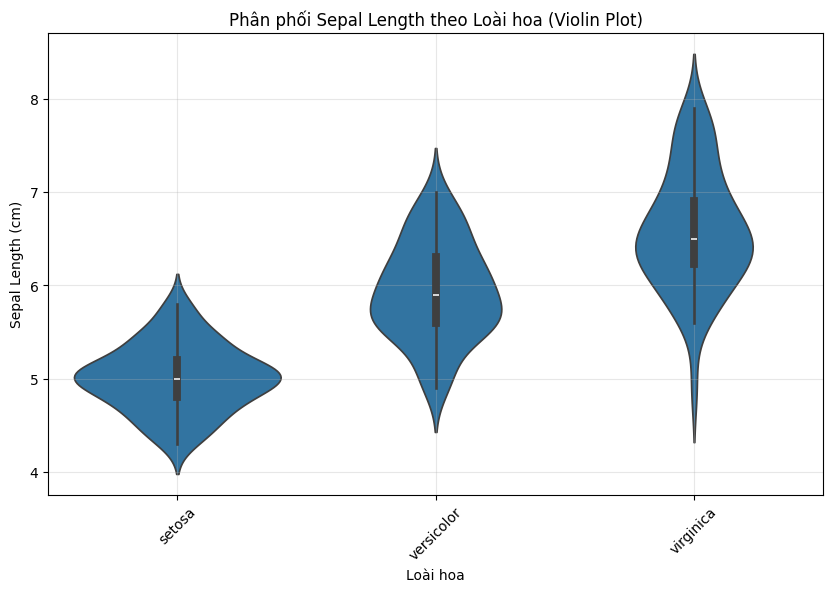

In [2]:
# Violin plot cơ bản cho sepal_length theo species
plt.figure(figsize=(10, 6))
sns.violinplot(data=iris, x='species', y='sepal_length')
plt.title('Phân phối Sepal Length theo Loài hoa (Violin Plot)')
plt.xlabel('Loài hoa')
plt.ylabel('Sepal Length (cm)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

2. VIOLIN PLOT NÂNG CAO VỚI TUỲ CHỈNH

C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\3993625936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(
C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\3993625936.py:4: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  violin = sns.violinplot(


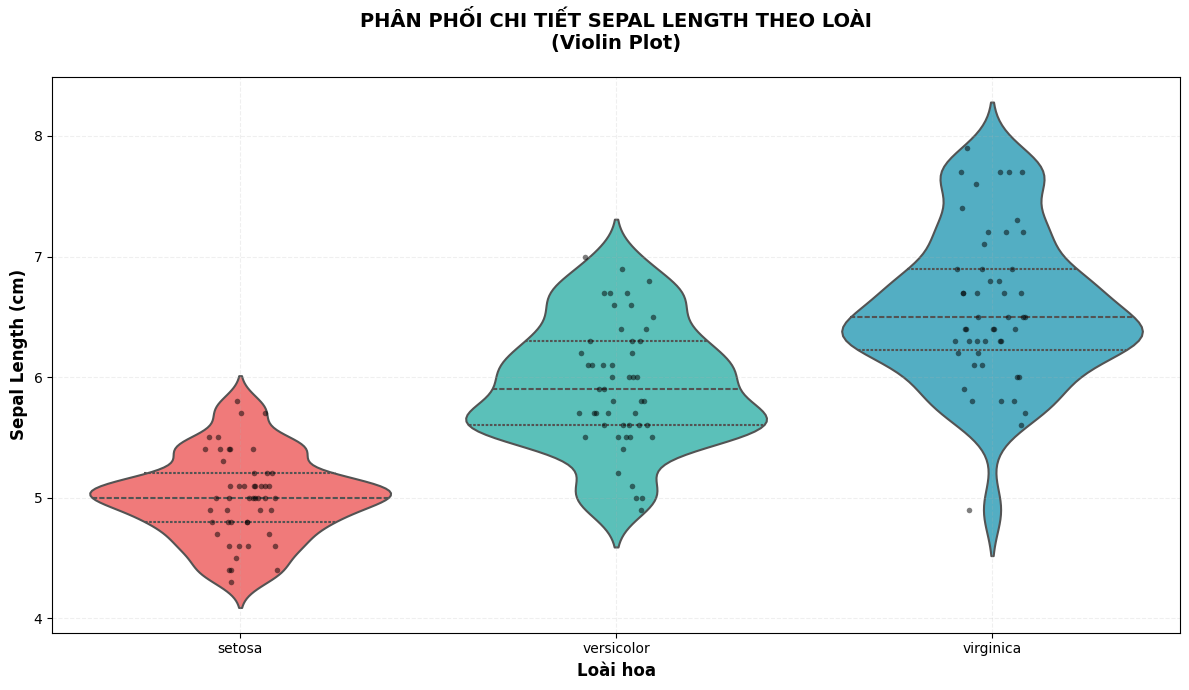

In [3]:
plt.figure(figsize=(12, 7))

# Tạo violin plot với nhiều tuỳ chỉnh
violin = sns.violinplot(
    data=iris, 
    x='species', 
    y='sepal_length',
    palette=['#FF6B6B', '#4ECDC4', '#45B7D1'],  # Màu sắc custom
    saturation=0.8,          # Độ bão hoà màu
    inner='quartile',        # Hiển thị đường quartile bên trong
    linewidth=1.5,           # Độ dày đường viền
    bw=0.3                   # Bandwidth - điều chỉnh độ mượt
)

# Tuỳ chỉnh thêm
plt.title('PHÂN PHỐI CHI TIẾT SEPAL LENGTH THEO LOÀI\n(Violin Plot)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Loài hoa', fontsize=12, fontweight='bold')
plt.ylabel('Sepal Length (cm)', fontsize=12, fontweight='bold')

# Thêm các điểm dữ liệu thực tế
sns.stripplot(
    data=iris, 
    x='species', 
    y='sepal_length',
    color='black', 
    alpha=0.5, 
    size=4,
    jitter=True
)

plt.grid(True, alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()

3. NHIỀU VIOLIN PLOT TRONG MỘT HÌNH

C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\3302577620.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\3302577620.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\3302577620.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\3302577620.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

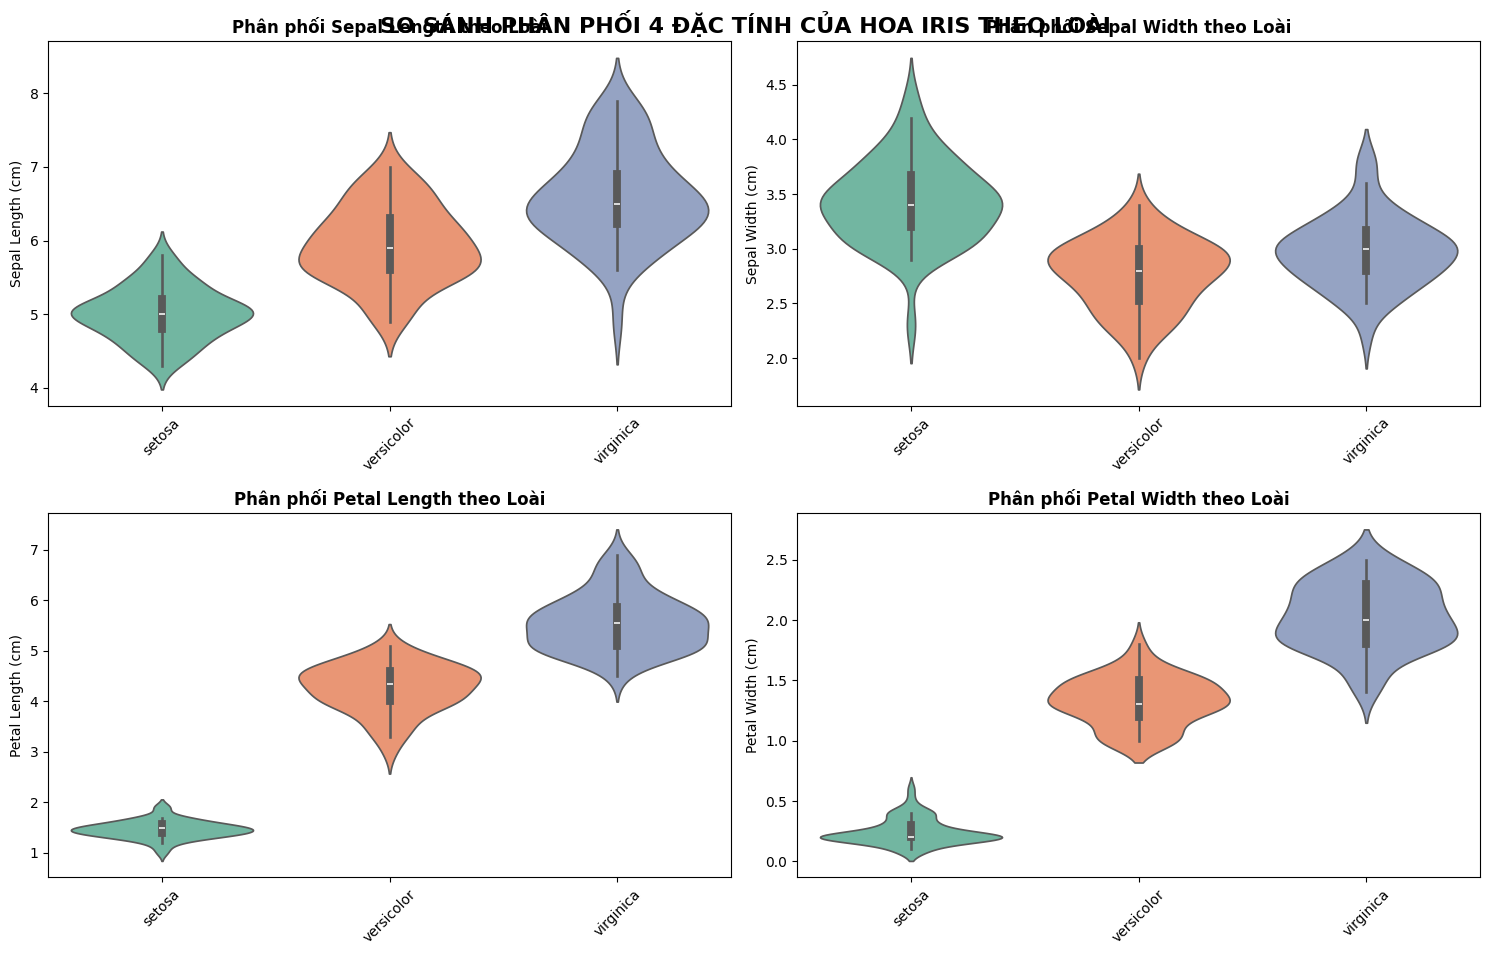

In [4]:
# Tạo subplot cho 4 đặc tính của hoa
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
titles = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

for i, (feature, title) in enumerate(zip(features, titles)):
    row, col = i // 2, i % 2
    sns.violinplot(
        data=iris, 
        x='species', 
        y=feature,
        ax=axes[row, col],
        palette='Set2',
        inner='box'  # Hiển thị box plot bên trong
    )
    axes[row, col].set_title(f'Phân phối {title} theo Loài', fontweight='bold')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel(f'{title} (cm)')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.suptitle('SO SÁNH PHÂN PHỐI 4 ĐẶC TÍNH CỦA HOA IRIS THEO LOÀI', 
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

4. VIOLIN PLOT KẾT HỢP SWARM PLOT

C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\3897556985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\3897556985.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


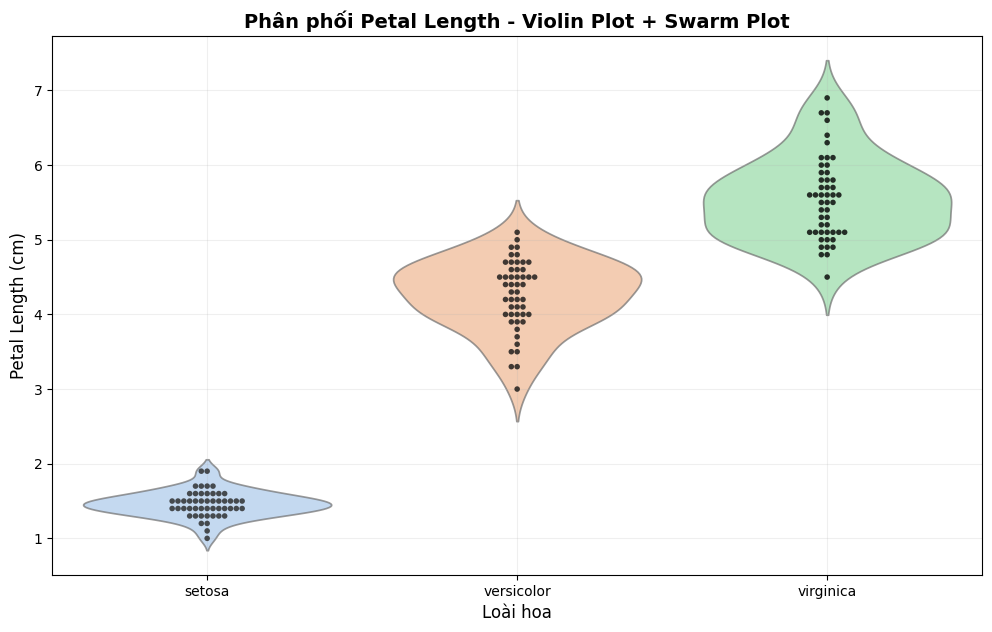

In [5]:
plt.figure(figsize=(12, 7))

# Tạo violin plot
sns.violinplot(
    data=iris, 
    x='species', 
    y='petal_length',
    palette='pastel',
    inner=None,  # Ẩn inner elements để thêm swarm plot
    alpha=0.7    # Độ trong suốt
)

# Thêm swarm plot để hiển thị tất cả điểm dữ liệu
sns.swarmplot(
    data=iris, 
    x='species', 
    y='petal_length',
    palette='dark:black',  # Màu tối cho contrast
    alpha=0.8,
    size=4
)

plt.title('Phân phối Petal Length - Violin Plot + Swarm Plot', 
          fontsize=14, fontweight='bold')
plt.xlabel('Loài hoa', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.grid(True, alpha=0.2)
plt.show()

5. VIOLIN PLOT THEO CHIỀU NGANG

C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\758304602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


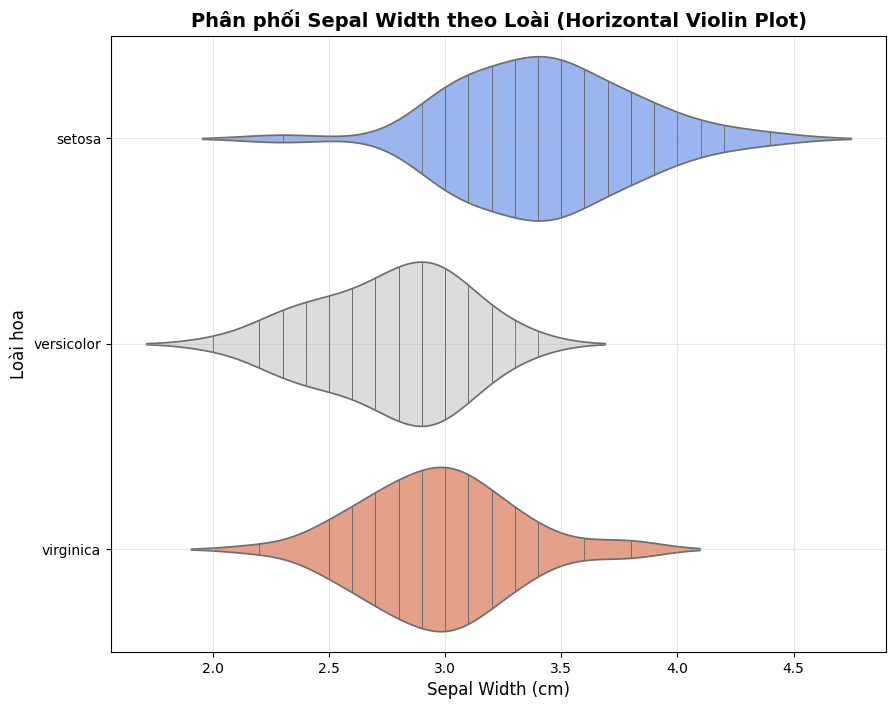

In [6]:
# Violin plot theo chiều ngang - đôi khi dễ so sánh hơn
plt.figure(figsize=(10, 8))

sns.violinplot(
    data=iris, 
    y='species',  # Đổi x và y để có horizontal plot
    x='sepal_width',
    palette='coolwarm',
    inner='stick',  # Hiển thị lines cho từng điểm dữ liệu
    orient='h'      # Horizontal orientation
)

plt.title('Phân phối Sepal Width theo Loài (Horizontal Violin Plot)',
          fontsize=14, fontweight='bold')
plt.ylabel('Loài hoa', fontsize=12)
plt.xlabel('Sepal Width (cm)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

6. PHÂN TÍCH THỐNG KÊ CHI TIẾT

PHÂN TÍCH THỐNG KÊ CHI TIẾT - PETAL LENGTH

Thống kê Petal Length theo loài:
            mean  median   std  min  max
species                                 
setosa      1.46    1.50  0.17  1.0  1.9
versicolor  4.26    4.35  0.47  3.0  5.1
virginica   5.55    5.55  0.55  4.5  6.9

ANOVA Test: F-statistic = 1180.1612, p-value = 0.0000000000


C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\2634284054.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=iris, x='species', y='petal_length', palette='viridis')
C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\2634284054.py:41: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\2634284054.py:41: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\2634284054.py:41: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\phanv\AppData\Local\Temp\ipykernel_10976\2634284054.py:41: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4

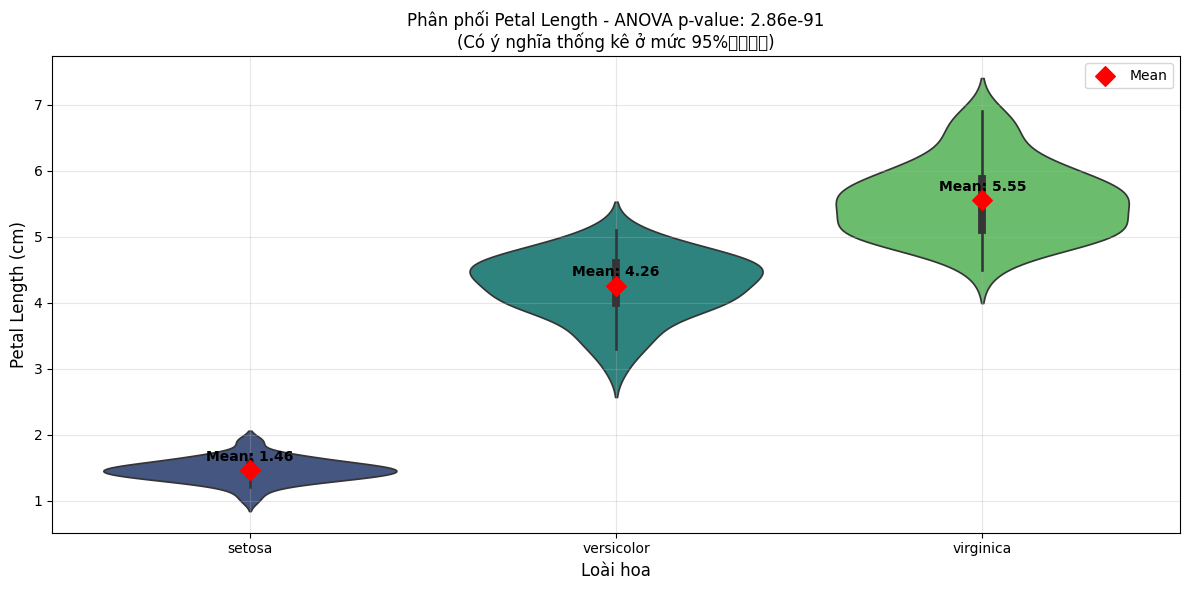

In [7]:
# Phân tích thống kê chi tiết kèm violin plot
print("=" * 60)
print("PHÂN TÍCH THỐNG KÊ CHI TIẾT - PETAL LENGTH")
print("=" * 60)

# Thống kê theo nhóm
stats = iris.groupby('species')['petal_length'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nThống kê Petal Length theo loài:")
print(stats.round(2))

# Kiểm tra ANOVA
from scipy.stats import f_oneway

setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']  
virginica = iris[iris['species'] == 'virginica']['petal_length']

f_stat, p_value = f_oneway(setosa, versicolor, virginica)
print(f"\nANOVA Test: F-statistic = {f_stat:.4f}, p-value = {p_value:.10f}")

# Visualize kết quả
plt.figure(figsize=(12, 6))

# Violin plot với annotation
ax = sns.violinplot(data=iris, x='species', y='petal_length', palette='viridis')

# Thêm giá trị trung bình
means = iris.groupby('species')['petal_length'].mean()
for i, (species, mean_val) in enumerate(means.items()):
    plt.scatter(i, mean_val, color='red', s=100, zorder=5, marker='D', label='Mean' if i == 0 else "")
    plt.text(i, mean_val + 0.1, f'Mean: {mean_val:.2f}', 
             ha='center', va='bottom', fontweight='bold')

plt.title(f'Phân phối Petal Length - ANOVA p-value: {p_value:.2e}\n'
          '(Có ý nghĩa thống kê ở mức 95%置信区间)' if p_value < 0.05 else 
          '(Không có ý nghĩa thống kê)', fontsize=12)
plt.xlabel('Loài hoa', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()